In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
df = pd.read_csv("cleaned_data.csv")
df_2 = pd.DataFrame()

In [3]:
df = df.drop(df.columns[0], axis=1)
df = df.dropna()


In [4]:
df

,lon_x,lat_x,lon_y,lay_y
0,-175.4962,-21.2593,178.258940,-23.204432
1,-175.5369,-21.0527,167.681800,-25.262985
2,-174.8840,-21.1788,179.800250,-28.662607
3,-175.0601,-20.9595,-170.202350,-21.615776
4,-174.8540,-21.2223,168.214260,-17.585007
...,...,...,...,...
32295,91.3428,22.2389,98.012240,14.563527
32296,91.3840,22.2174,98.043900,14.365323
32297,91.3574,22.2282,93.120960,15.444310
32298,91.3282,22.2190,94.893936,15.868206


In [5]:
#Introducimos inicio y nos predice donde acabará

lm1= LinearRegression()

X = df[["lon_x", "lat_x"]].values
Y = df[["lon_y", "lay_y"]].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [6]:
lm1.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = lm1.predict(X_test)

In [8]:
#MSE Y R2 SCORE
print("MSE:,", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE:, 232.03950753711854
R2 score: 0.9104625011549314


In [9]:
#Comparacion pred = real:
i=1000
print(y_pred[i])
print(y_test[i])

[-66.06996055  18.50738006]
[-75.56588   20.633709]


In [10]:

#Ej predicción:
miami = np.array((-175.4962,-21.2593)).reshape(-1,2)

miami_pred = lm1.predict(miami)

print(miami_pred)

[[-168.81158722  -21.4041336 ]]


In [11]:

#Con el lugar de la basura predecir de donde a venido

lm2 = LinearRegression()

Y = df[["lon_x", "lat_x"]].values
X = df[["lon_y", "lay_y"]].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

lm2.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred2 = lm2.predict(X_test)

In [15]:
print("MSE:,", mean_squared_error(y_test, y_pred2))
print("R2 score:", r2_score(y_test, y_pred2))

MSE:, 242.42989781863298
R2 score: 0.9101407244563186


In [111]:
#Ejemplos
i=430
y_test_i = y_test[i]
y_pred_i = y_pred[i]
print(y_test_i)
print(y_pred_i)

print(X_test[i])

[-72.3148  18.0243]
[-83.59970143  28.92791487]
[-92.84819   29.537909]


In [ ]:

#FUNCIONALIDAD DEL ALGORITMO:

In [48]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [86]:
option = int(input("Predecir el final de tirar basura en x punto (0) o predecir de donde procede la basura de x punto (1)"))

La basura de [ 29.537909 -92.84819 ] proceden de  [ 29.1965256  -83.83346516]


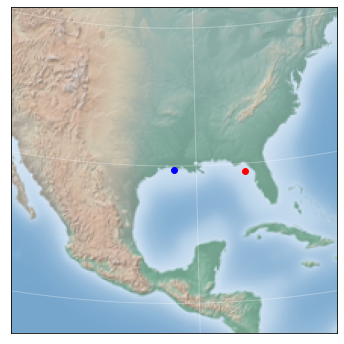

In [114]:
if option == 0:
    wrd1 = "Start"
    wrd2 = "End"
    lat = float(input("Introduce la latitud de inicio:"))
    lon = float(input("Introduce la longitud de inicio:"))
    Cordenadas = np.array((lat, lon)).reshape(-1,2)
    coor_pred = lm1.predict(Cordenadas)
    print("Si tras basura en " + str(Cordenadas[0]) + " acabarán en " + str(coor_pred[0]))

elif option == 1:
    wrd1 = "End"
    wrd2 = "Start"
    lat = float(input("Introduce la latitud de fin:"))
    lon = float(input("Introduce la longitud de fin:"))
    Cordenadas = np.array((lat, lon)).reshape(-1,2)
    coor_pred = lm2.predict(Cordenadas) 
    print("La basura de " + str(Cordenadas[0]) + " proceden de  " + str(coor_pred[0]))

fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=4E6,
            lat_0=Cordenadas[0][0], lon_0=Cordenadas[0][1],)

draw_map(m)

plot_data = m.scatter(Cordenadas[0][1], Cordenadas[0][0], s=35, latlon=True, c="blue")
#t = plt.text(Cordenadas[0][0]-3E-10, Cordenadas[0][1]+3E-10, [wrd1], fontsize=9)
plot_data = m.scatter(coor_pred[0][1], coor_pred[0][0], s=35, latlon=True, c="red")
#t = plt.text(coor_pred[0][0]+3E-10, coor_pred[0][1]-3E-10, [wrd2], fontsize=9)

In [ ]:
plt.savefig('lr.png', dpi=1000.0, bbox_inches='tight', pad_inches=0.5) #Download image